# Proyecto  covid-19
 Este proyecto se elabora con un fin educativo utilizando herramientas de machine learning he implementandolas a medida que voy avanzando en el curso utilizando  un conjunto de datos de mundo real 
 el data sets que se utiliza se descargo de l apagina https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863 

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
data_url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

In [3]:
covid_data = pd.read_excel(data_url)

In [4]:
covid_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia


In [5]:
covid_data.columns.values.tolist()

['dateRep',
 'day',
 'month',
 'year',
 'cases',
 'deaths',
 'countriesAndTerritories',
 'geoId',
 'countryterritoryCode',
 'popData2018',
 'continentExp']

# Data Cleaning

In [6]:
subset_covid=covid_data[["day","month","year","cases","deaths","countriesAndTerritories"]]

In [7]:
subset_covid.head(10)

,day,month,year,cases,deaths,countriesAndTerritories
0,10,5,2020,255,6,Afghanistan
1,9,5,2020,215,3,Afghanistan
2,8,5,2020,171,2,Afghanistan
3,7,5,2020,168,9,Afghanistan
4,6,5,2020,330,5,Afghanistan
5,5,5,2020,190,5,Afghanistan
6,4,5,2020,235,13,Afghanistan
7,3,5,2020,134,4,Afghanistan
8,2,5,2020,164,4,Afghanistan
9,1,5,2020,222,4,Afghanistan


In [8]:
subset_covid.isnull().values.any() # para saber su en el dataset tenemos valores Nan

False

In [23]:
subset_covid_col=subset_covid[subset_covid["countriesAndTerritories"]=="Colombia"]
subset_covid_col

,day,month,year,cases,deaths,countriesAndTerritories
3292,10,5,2020,444,17,Colombia
3293,9,5,2020,595,21,Colombia
3294,8,5,2020,497,10,Colombia
3295,7,5,2020,346,19,Colombia
3296,6,5,2020,640,20,Colombia
...,...,...,...,...,...,...
3348,15,3,2020,18,0,Colombia
3349,14,3,2020,7,0,Colombia
3350,12,3,2020,6,0,Colombia
3351,10,3,2020,2,0,Colombia


(array([ 2.,  5.,  5., 11., 13.,  8.,  8.,  5.,  2.,  2.]),
 array([-2.13104933, -1.69315252, -1.2552557 , -0.81735889, -0.37946208,
         0.05843473,  0.49633155,  0.93422836,  1.37212517,  1.81002199,
         2.2479188 ]),
 <a list of 10 Patch objects>)

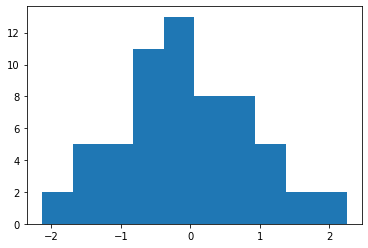

In [24]:
a =np.random.randn(len(subset_covid_col))
plt.hist(a)

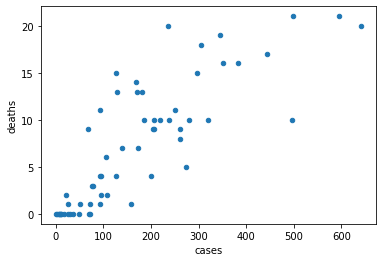

In [13]:
subset_covid_col.plot(kind="scatter", x="cases", y ="deaths")

In [16]:
x = subset_covid_col ["cases"].fillna(subset_covid_col["cases"].mean())
y = subset_covid_col["deaths"].fillna(subset_covid_col["deaths"].mean())
x_data = x[ :, np.newaxis]

In [19]:
lm = LinearRegression()
lm.fit(x_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

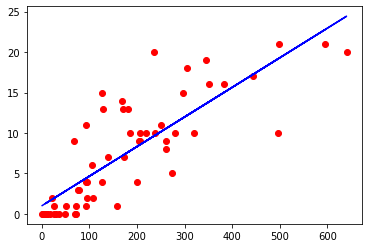

In [20]:
%matplotlib inline
plt.plot(x,y, "ro")
plt.plot (x, lm.predict(x_data), color="blue")